<a href="https://www.kaggle.com/code/vidhikishorwaghela/deep-learning-for-eeg-emotion-classification?scriptVersionId=141898324" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# This Python code is designed to analyze and visualize EEG (Electroencephalography) data related to human emotions. 

## The code follows these main steps:

## Step1: Data Loading: 

It starts by loading a dataset containing EEG data and emotion labels. Each emotion is assigned a numerical value (0 for NEGATIVE, 1 for NEUTRAL, and 2 for POSITIVE).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import signal
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import random

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the dataset
data = pd.read_csv('/kaggle/input/eeg-brainwave-dataset-feeling-emotions/emotions.csv')

In [3]:
data.head(3)

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.07,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.0,-162.0,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.55,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.6,-31.6,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.90,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.0,-148.0,281.00,POSITIVE


In [4]:
# Convert labels to numerical values
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
data['label'] = data['label'].map(label_mapping)

## Step2: Emotion Distribution: 

The code creates a pie chart to visualize the distribution of emotions in the dataset. It helps understand how emotions are represented in the data.

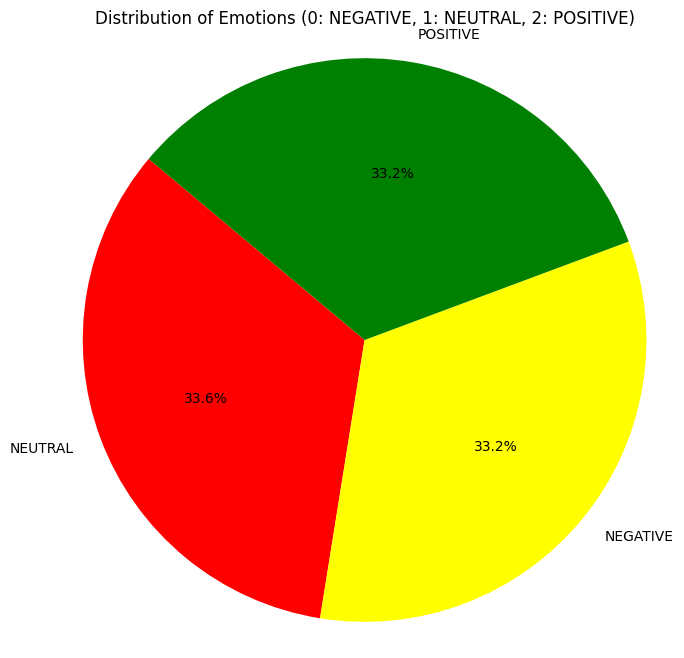

In [5]:
# Visualization using a Pie Chart

# Count the occurrences of each emotion
emotion_counts = data['label'].value_counts()

# Define emotional labels
emotional_labels = {0: 'NEGATIVE', 1: 'NEUTRAL', 2: 'POSITIVE'}

# Map numerical labels to emotional labels
emotion_labels = [emotional_labels[label] for label in emotion_counts.index]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_labels, autopct='%1.1f%%', startangle=140, colors=['red', 'yellow', 'green'])
plt.title("Distribution of Emotions (0: NEGATIVE, 1: NEUTRAL, 2: POSITIVE)")
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

plt.show()


## Step3: Time-Series Visualization: 

The code displays a time-series plot of EEG data from a single sample. It shows how the EEG signal varies over time.

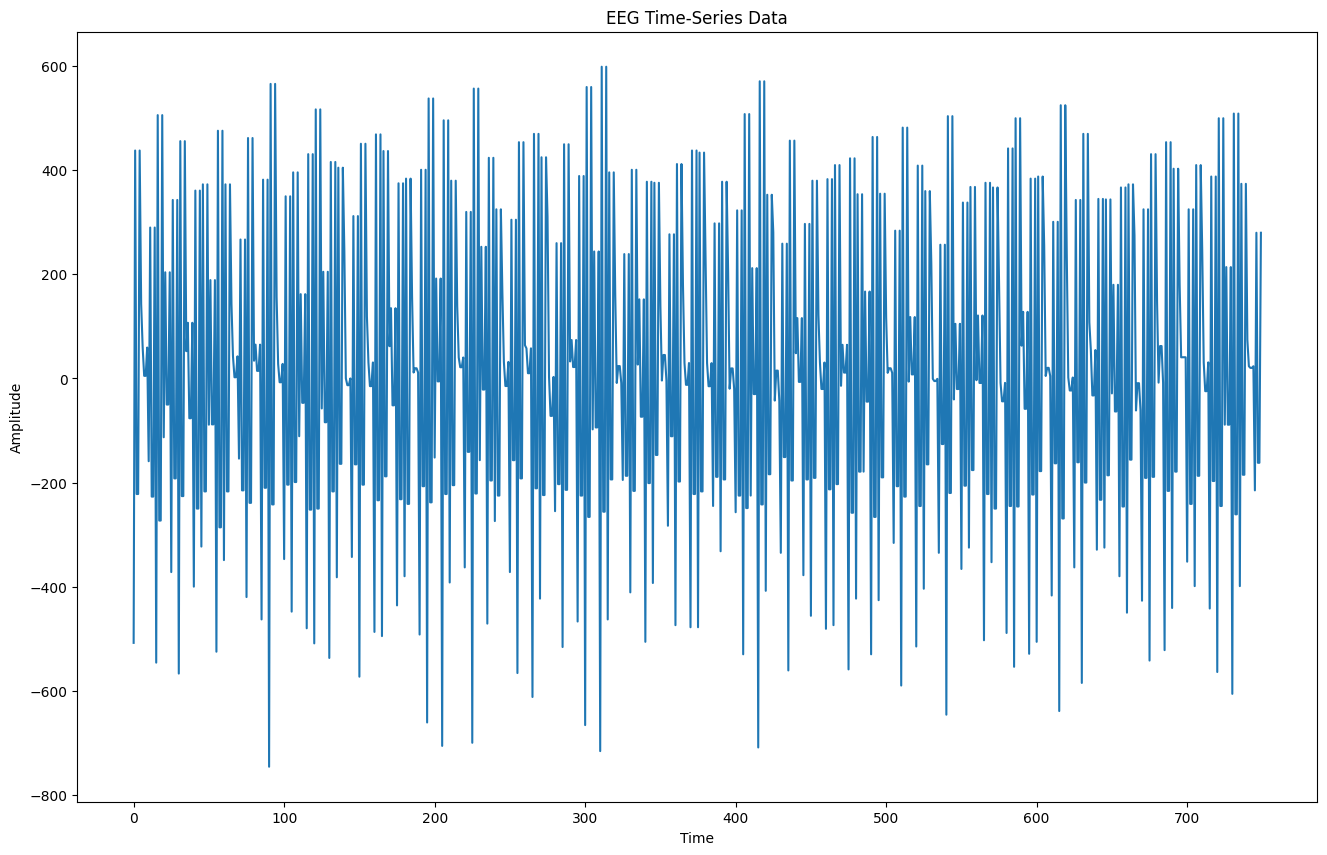

In [6]:
# Time-Series Visualization
sample = data.loc[0, 'fft_0_b':'fft_749_b']
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("EEG Time-Series Data")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

## Step4: Spectral Analysis: 

The code performs spectral analysis on the EEG data, providing insights into frequency components. It displays a power spectral density plot.

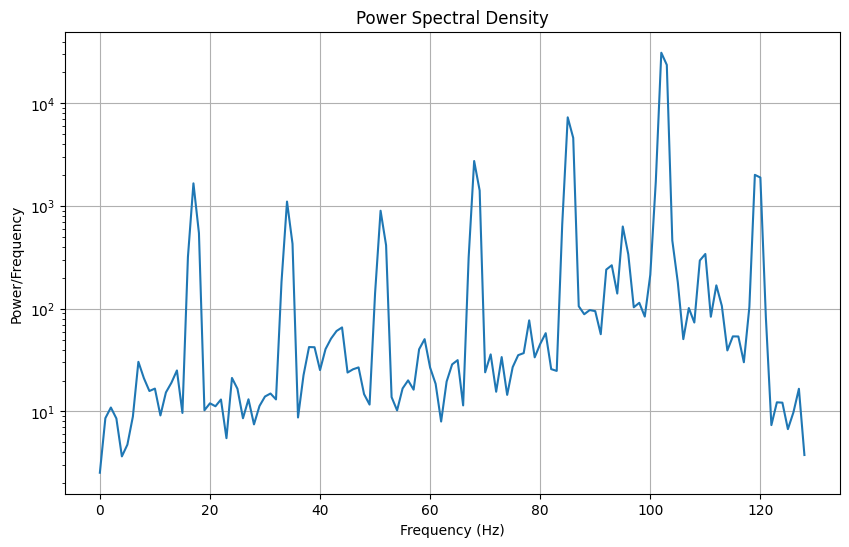

In [7]:
# Replace 'your_sampling_rate' with the actual sampling rate of your EEG data
sampling_rate = 256  # Replace with your EEG data's sampling rate

# Spectral Analysis
frequencies, power_density = signal.welch(sample, fs=sampling_rate)
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, power_density)
plt.title("Power Spectral Density")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency")
plt.grid()
plt.show()


## Step5: Correlation Heatmap: 

A heatmap is generated to show correlations between different features in the EEG data. This helps identify patterns and relationships among features.

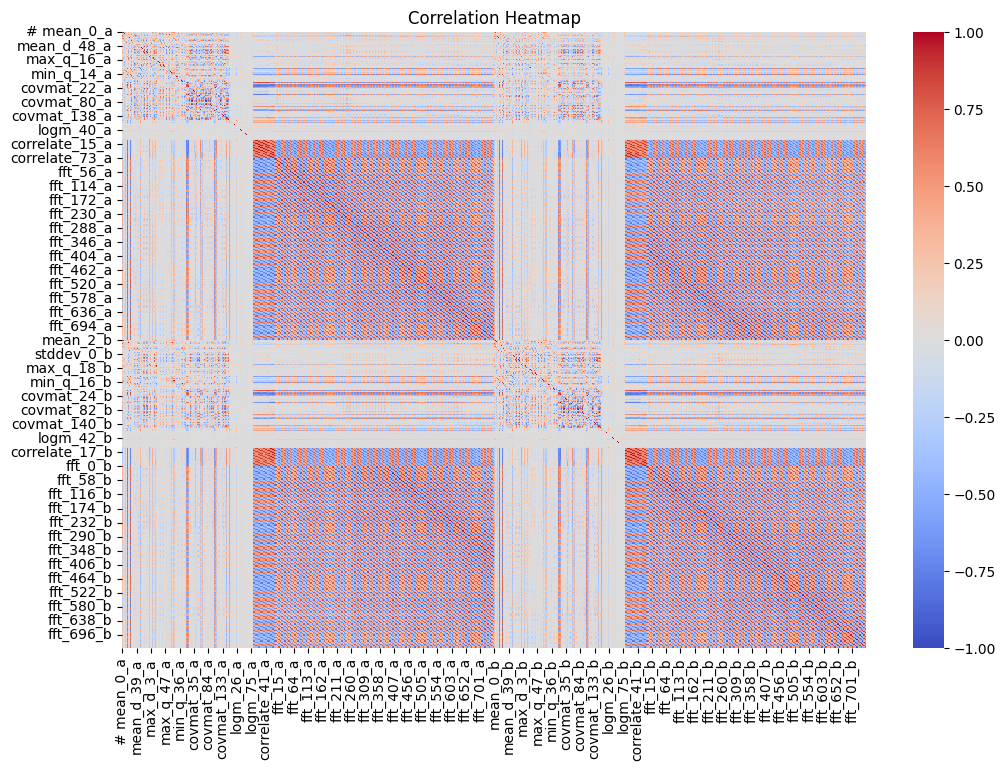

In [8]:
# Correlation Heatmap
correlation_matrix = data.drop('label', axis=1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

## Step6: t-SNE Visualization: 

t-SNE (t-distributed Stochastic Neighbor Embedding) is used for dimensionality reduction and visualization of the EEG data in two dimensions. It helps visualize the data's separability based on emotions.

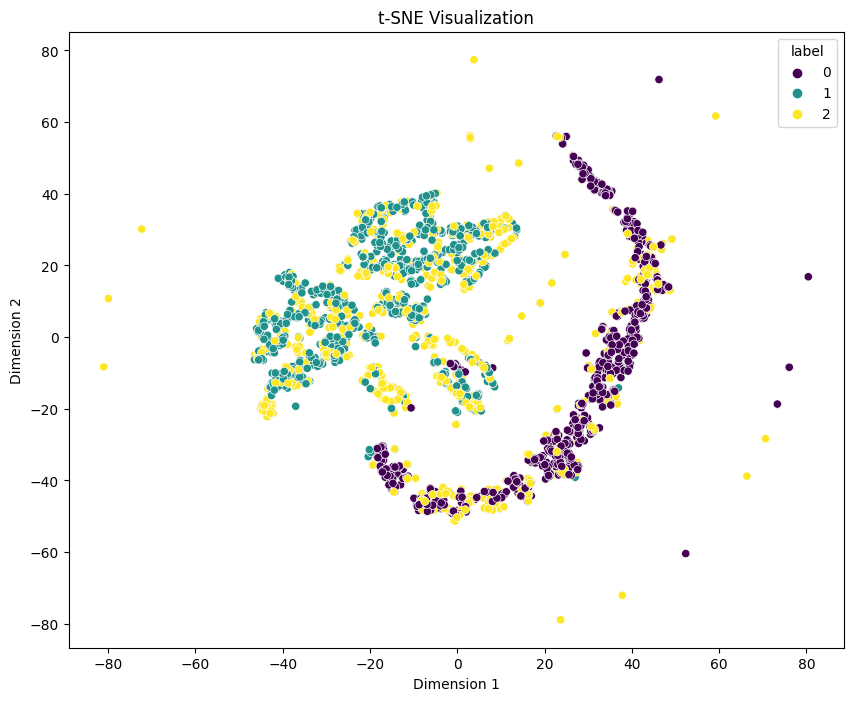

In [9]:
# t-SNE Visualization
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data.drop('label', axis=1))
tsne_df = pd.DataFrame(tsne_results, columns=['Dimension 1', 'Dimension 2'])
tsne_df['label'] = data['label']
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='label', data=tsne_df, palette='viridis')
plt.title("t-SNE Visualization")
plt.show()


## Step7: Feature Significance Analysis: 

The code assesses the significance of different features in predicting emotions. It calculates the number of significant and non-significant features for each emotion.

In [10]:
# Define emotions based on unique labels in the dataset
emotions = data['label'].unique()

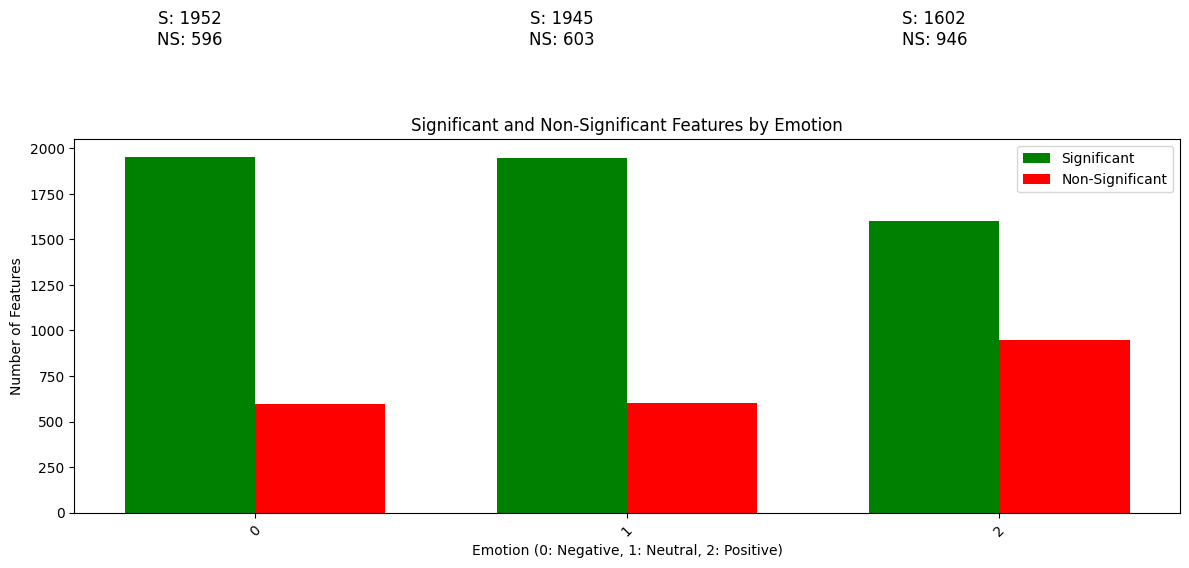

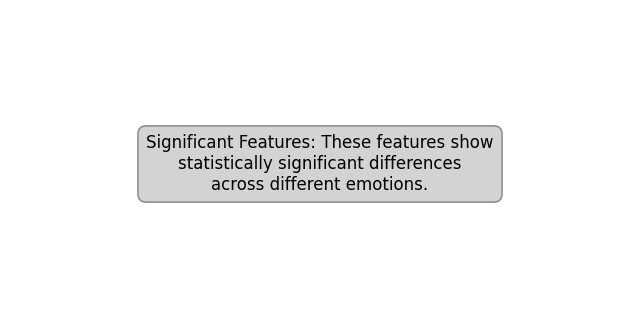

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Define colors for significant and non-significant features
significant_color = 'green'
non_significant_color = 'red'

# Create a dictionary to store the number of significant and non-significant features for each emotion
num_features = {emotion: {'significant': 0, 'non-significant': 0} for emotion in emotions}

# Perform t-tests and count significant features for each emotion
for emotion in emotions:
    subset = data[data['label'] == emotion]
    for feature in data.columns[:-1]:
        _, p_value = ttest_ind(subset[feature], data[feature])
        if p_value < 0.05:
            num_features[emotion]['significant'] += 1
        else:
            num_features[emotion]['non-significant'] += 1

# Extract emotion labels and corresponding feature counts
emotion_labels = list(num_features.keys())
significant_counts = [num_features[emotion]['significant'] for emotion in emotion_labels]
non_significant_counts = [num_features[emotion]['non-significant'] for emotion in emotion_labels]

# Create a bar chart to visualize the number of significant and non-significant features for each emotion
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(emotion_labels))

plt.bar(index, significant_counts, bar_width, label='Significant', color=significant_color)
plt.bar(index + bar_width, non_significant_counts, bar_width, label='Non-Significant', color=non_significant_color)

# Add labels and title
plt.xlabel('Emotion (0: Negative, 1: Neutral, 2: Positive)')
plt.ylabel('Number of Features')
plt.title('Significant and Non-Significant Features by Emotion')
plt.xticks(index + bar_width / 2, emotion_labels)
plt.legend()

# Display the counts above the bars
for i, (significant_count, non_significant_count) in enumerate(zip(significant_counts, non_significant_counts)):
    plt.text(i, significant_count + non_significant_count + 1, f'S: {significant_count}\nNS: {non_significant_count}', ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()

# Explanation for significant features
plt.figure(figsize=(8, 4))
plt.text(0.5, 0.5, 'Significant Features: These features show\nstatistically significant differences\nacross different emotions.',
         ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightgray', edgecolor='gray', boxstyle='round,pad=0.5'))
plt.axis('off')

plt.show()


## Step8: Advanced Preprocessing: 

The EEG data is normalized using z-score normalization. Then, the data is split into training and testing sets for machine learning.

In [12]:
# Advanced Preprocessing

# Normalization (e.g., z-score normalization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])

In [13]:
# Split the data into training and testing sets
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


## Step9: Neural Network Model: 

An advanced neural network model is built and trained using TensorFlow/Keras. This model is designed to predict emotions based on EEG features.

In [14]:
# Build the advanced neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [15]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=70, batch_size=32, verbose=2)


Epoch 1/70
38/38 - 5s - loss: 1.0253 - accuracy: 0.7703 - val_loss: 0.2508 - val_accuracy: 0.9231 - 5s/epoch - 123ms/step
Epoch 2/70
38/38 - 0s - loss: 0.8748 - accuracy: 0.8575 - val_loss: 0.4789 - val_accuracy: 0.9298 - 143ms/epoch - 4ms/step
Epoch 3/70
38/38 - 0s - loss: 0.7418 - accuracy: 0.8684 - val_loss: 0.3159 - val_accuracy: 0.9264 - 147ms/epoch - 4ms/step
Epoch 4/70
38/38 - 0s - loss: 0.6182 - accuracy: 0.8877 - val_loss: 0.2714 - val_accuracy: 0.9164 - 148ms/epoch - 4ms/step
Epoch 5/70
38/38 - 0s - loss: 0.6912 - accuracy: 0.9044 - val_loss: 0.3392 - val_accuracy: 0.9130 - 149ms/epoch - 4ms/step
Epoch 6/70
38/38 - 0s - loss: 0.3678 - accuracy: 0.9095 - val_loss: 0.2821 - val_accuracy: 0.9298 - 182ms/epoch - 5ms/step
Epoch 7/70
38/38 - 0s - loss: 0.3117 - accuracy: 0.9086 - val_loss: 0.2976 - val_accuracy: 0.9298 - 144ms/epoch - 4ms/step
Epoch 8/70
38/38 - 0s - loss: 0.2207 - accuracy: 0.9329 - val_loss: 0.3061 - val_accuracy: 0.9264 - 142ms/epoch - 4ms/step
Epoch 9/70
38/38 

### Step10: Model Evaluation: 

The code evaluates the model's performance using metrics like accuracy, and it generates a confusion matrix to visualize the model's predictions.

In [17]:
# Evaluate the model
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 97.812%


In [18]:
# Make predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)


20/20 [==============================] - 0s 2ms/step


In [19]:
# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())


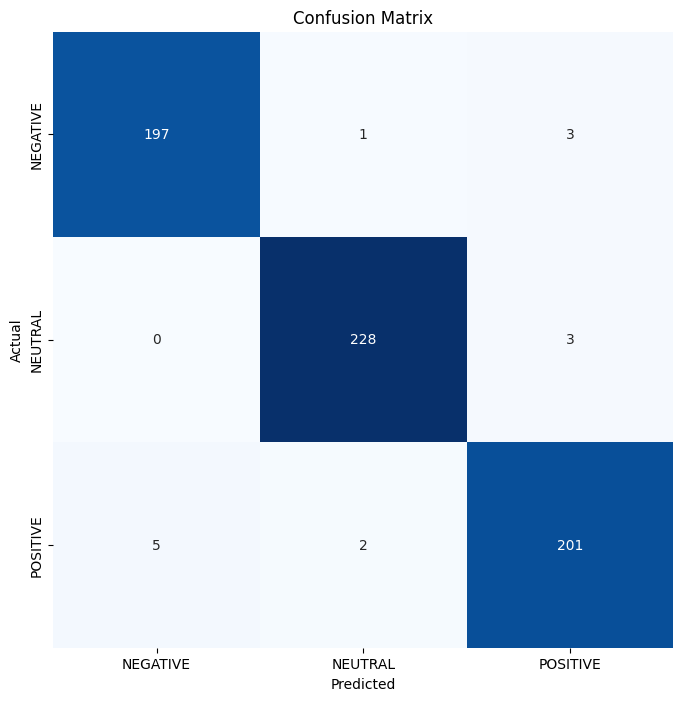

In [20]:
# Visualization of Confusion Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# Print Classification Report
print("Classification Report:\n", clr)

Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.98      0.98      0.98       201
     NEUTRAL       0.99      0.99      0.99       231
    POSITIVE       0.97      0.97      0.97       208

    accuracy                           0.98       640
   macro avg       0.98      0.98      0.98       640
weighted avg       0.98      0.98      0.98       640



### Step11: EEG Signal Visualization: 

A random sample from the test data is selected, and the model predicts the associated emotion. The EEG signals for this sample are visualized for all available channels.

In [22]:
# Define the label mapping dictionary
label_mapping = {0: 'NEGATIVE', 1: 'NEUTRAL', 2: 'POSITIVE'}


In [23]:
import random

# Define a dictionary for emotion labels
emotion_labels = {0: 'NEGATIVE', 1: 'NEUTRAL', 2: 'POSITIVE'}

# Print the true and predicted emotion labels for 6 to 7 random samples
for i in range(6, 8):
    random_index = random.randint(0, len(X_test) - 1)
    sample_input = X_test.iloc[random_index].values.reshape(1, -1)
    true_label = y_test.iloc[random_index]
    true_emotion = emotion_labels.get(true_label, 'Unknown')  # Use .get() to avoid KeyError

    # Predict emotion for the sample input
    predicted_emotion = model.predict(sample_input)
    predicted_label = emotion_labels[np.argmax(predicted_emotion)]

    # Display the true and predicted emotion labels
    print(f"Sample {i}: Real Emotion Label: {true_emotion}, Predicted Emotion Label: {predicted_label}")


1/1 [==============================] - 0s 59ms/step
Sample 6: Real Emotion Label: NEGATIVE, Predicted Emotion Label: NEGATIVE
1/1 [==============================] - 0s 18ms/step
Sample 7: Real Emotion Label: NEGATIVE, Predicted Emotion Label: NEGATIVE


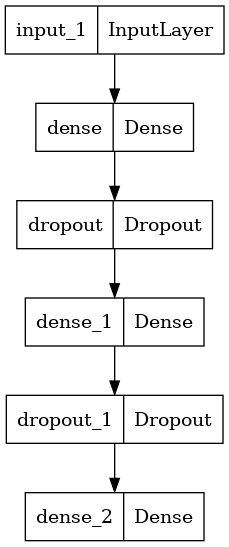

In [24]:
tf.keras.utils.plot_model(model)

## Summary:

This code explores EEG (electroencephalogram) data associated with human emotions. It covers data loading, preprocessing, and visualization, including a pie chart showing emotion distribution and time-series and spectral analysis of EEG signals. It also analyzes feature significance for emotion prediction and builds and evaluates a neural network model. The code aims to understand the connection between EEG data and emotions, ultimately providing a trained model for emotion 
prediction.

## Key Takeaways:

EEG data reveals emotional patterns.
Neural network model predicts emotions.
Code provides a holistic approach to EEG emotion analysis.
This code serves as a valuable resource for EEG-based emotion research and prediction.

Overall, this code provides a comprehensive workflow for analyzing EEG data related to emotions. It covers data exploration, visualization, feature analysis, preprocessing, machine learning model building, and model evaluation. The key takeaway is a deeper understanding of the relationship between EEG signals and human emotions, along with a trained model for emotion prediction.
